In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Polynomial fit

 ```
     numpy.polyval(p, x)

        Evaluate a polynomial at specific values.

        If p is of length N, this function returns the value:
            p[0]*x**(N-1) + p[1]*x**(N-2) + ... + p[N-2]*x + p[N-1]
            
            
     numpy.polyfit(x, y, deg)

        Least squares polynomial fit.
        Fit a polynomial p(x) = p[0] * x**deg + ... + p[deg] of degree deg to points (x, y). Returns a vector of coefficients p that minimises the squared error.

```
 Documentation: 
[polyval](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyval.html#numpy.polyval),
 [polyfit](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html#numpy.polyfit)

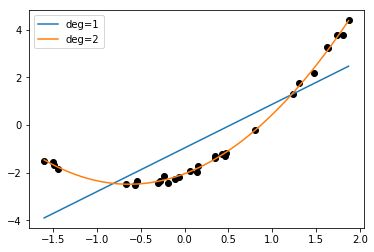

In [2]:
npts=30
p0=[1.1,1.4,-2.1]

# generate datapoints
x=np.random.uniform(-2,2,npts)
y=np.polyval(p0,x)

# add some noise
np.random.seed(0)
y+=np.random.randn(*y.shape)*0.1

# fit data with a polynomial of degree 1
pfit1=np.polyfit(x,y,1)
# fit data with a polynomial of degree 2
pfit2=np.polyfit(x,y,2)

# generate best-fit lines
xfit=np.linspace(x.min(),x.max(),50)
yfit1=np.polyval(pfit1,xfit)
yfit2=np.polyval(pfit2,xfit)

# plot
fig,ax=plt.subplots()
ax.plot(x,y,'ok')
ax.plot(xfit,yfit1,label='deg=1')
ax.plot(xfit,yfit2,label='deg=2')
ax.legend();


# Numpy `polynomial` Package

Polynomials in NumPy can be created, manipulated, and even fitted using the Using the Convenience Classes of the `numpy.polynomial` package.
In the first example we used power series. 
The module provides a number of objects (mostly functions) useful for dealing with:
* Chebyshev series
* Legendre series
* Laguerre series
* Hermite series

[Read the doc](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.polynomials.html)

## Example: Chebyshev Module
The following example show how to define a Chebyshev polynomial and how to fit 1D data with a Chebyshev polynomial.

The reference manual to [Chebyshev Module](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.polynomials.chebyshev.html)

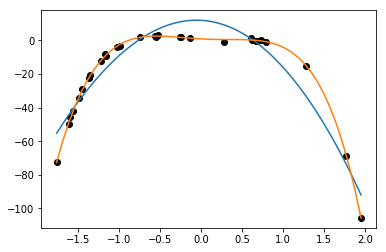

In [3]:
from numpy.polynomial.chebyshev import chebval,chebfit

npts=30
p0=[-.1,-1.1,-2.1,0.3,-1.1]

# generate datapoints
x=np.random.uniform(-2,2,npts)
y=chebval(x,p0)
# add some noise
y+=np.random.randn(*y.shape)*1

# fit data with a polynomial of degree 3
pfit1=chebfit(x,y,3)
# fit data with a polynomial of degree 5
pfit2=chebfit(x,y,5)

# generate best-fit lines
xfit=np.linspace(x.min(),x.max(),50)
yfit1=chebval(xfit,pfit1)
yfit2=chebval(xfit,pfit2)

# plot
fig,ax=plt.subplots()
ax.plot(x,y,'ok')
ax.plot(xfit,yfit1,label='deg=1')
ax.plot(xfit,yfit2,label='deg=2')
#ax.legend();

# The `astropy.modeling` Package
This subpackage provides a framework for representing models and performing model evaluation and fitting. It supports 1D and 2D models and fitting with parameter constraints. It has some predefined models and fitting routines. For a list of available models [read the doc](http://docs.astropy.org/en/stable/modeling/index.html#module-astropy.modeling)

It is possible to define new models either from existing functions, or by writing a `Model` subclass; an additional way to create new models is by combining them using arithmetic expressions.

The following examples illustrates a 1D and a 2D case:
* [BrokenPowerLaw](http://docs.astropy.org/en/stable/api/astropy.modeling.powerlaws.BrokenPowerLaw1D.html#astropy.modeling.powerlaws.BrokenPowerLaw1D)
* [2D Sersic profile](http://docs.astropy.org/en/stable/api/astropy.modeling.functional_models.Sersic2D.html#astropy.modeling.functional_models.Sersic2D)

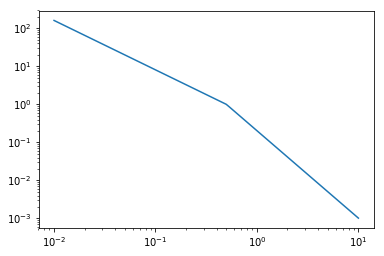

In [4]:
from astropy.modeling.models import BrokenPowerLaw1D

# BrokenPowerLaw1D(amplitude=1, x_break=1, alpha_1=1, alpha_2=1)

# Build a powerlaw with alpha=2.3 for x>0.5 and alpha=1.3 for x<.5 
f=BrokenPowerLaw1D(amplitude=1, x_break=0.5, alpha_1=1.3, alpha_2=2.3)

x=np.logspace(-2,1,100)
y=f(x)

fig,ax=plt.subplots()
ax.plot(x,y)

ax.set_xscale('log')
ax.set_yscale('log')

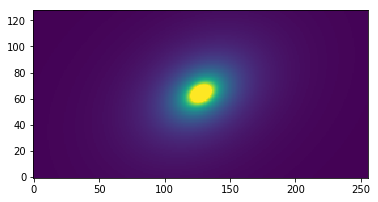

In [5]:
from astropy.modeling.models import Sersic2D

f=Sersic2D(amplitude=1, r_eff=50, n=2.5, x_0=128, y_0=64, ellip=0.3, theta=np.pi/6)
y, x = np.mgrid[:128, :256]

ima=f(x,y)

fig,ax=plt.subplots()
ax.imshow(ima,origin='lower',vmin=0,vmax=0.1*ima.max())

# `astropy.modeling`: Fitting models to data

The [astropy.modeling.fitting](http://docs.astropy.org/en/stable/modeling/fitting.html) supports 1D and 2D models and fitting with parameter constraints.
This module implements classes (called Fitters) which combine optimization algorithms (typically from scipy.optimize) with statistic functions to perform fitting. 

In the following examples we will use:
* `LevMarLSQFitter()` : Levenberg-Marquardt algorithm and least squares statistic.
* `FittingWithOutlierRemoval(fitter, outlier_func)` :	combines an outlier removal technique with a fitting procedure.

Docs:
* [http://docs.astropy.org/en/stable/modeling/fitting.html](http://docs.astropy.org/en/stable/modeling/fitting.html)
* [http://docs.astropy.org/en/stable/modeling/index.html#module-astropy.modeling.fitting](http://docs.astropy.org/en/stable/modeling/index.html#module-astropy.modeling.fitting)

## Basic usage: Fit a 1D gaussin to data

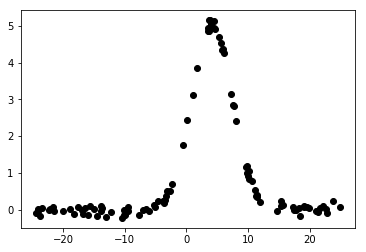

In [6]:
from astropy.modeling import models, fitting

npts=100

amplitude=5.01
mean=4.1
stddev=3.3
data_sigma=.1

# generate the data
x=np.random.uniform(-25,25,npts)
f = models.Gaussian1D(amplitude=amplitude, mean=mean, stddev=stddev)
# add noise
y=f(x)+np.random.normal(loc=0,scale=data_sigma,size=npts)

fig,ax=plt.subplots()
ax.plot(x,y,'ok')

IN:
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
    amplitude mean stddev
    --------- ---- ------
         10.0  0.0    5.0
OUT:
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
      amplitude        mean         stddev   
    ------------- ------------- -------------
    5.03605428574 4.13716738116 3.24371608715


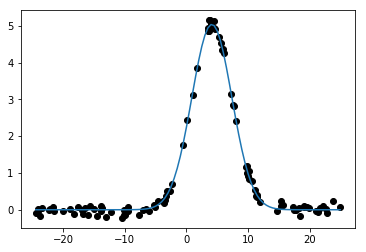

In [7]:
# fit the data to the model

# model with initial guess 
f_init=models.Gaussian1D(amplitude=10,mean=0,stddev=5)

# fitter :Levenberg-Marquardt algorithm 
fit_g = fitting.LevMarLSQFitter()

f_fit = fit_g(f_init, x, y)

# print results
print ("IN:")
print (f_init)
print ("OUT:")
print (f_fit)

# geerate best-fit curve
xfit=(np.linspace(x.min(),x.max(),100))
yfit=f_fit(xfit)

# plot
fig,ax=plt.subplots()
ax.plot(x,y,'ok')
ax.plot(xfit,yfit);

## set parameters contraints

IN:
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
    amplitude mean stddev
    --------- ---- ------
          3.0  0.0    3.3
OUT:
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
      amplitude        mean     stddev
    ------------- ------------- ------
    5.01029544101 4.12246114618    3.3


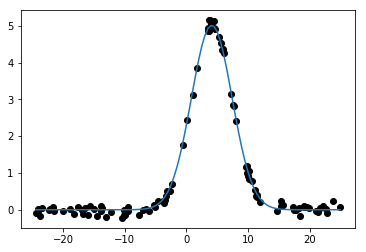

In [8]:
# fit the data to the model

# model with initial guess 
f_init=models.Gaussian1D(amplitude=3,mean=0,stddev=stddev)

# fix the value of a parameter
f_init.stddev.fixed=True

# set limits for the values of a param
f_init.amplitude.bounds=(0,10)

# fitter :Levenberg-Marquardt algorithm 
fit_g = fitting.LevMarLSQFitter()

f_fit = fit_g(f_init, x, y)

# print results
print ("IN:")
print (f_init)
print ("OUT:")
print (f_fit)

# geerate best-fit curve
xfit=(np.linspace(x.min(),x.max(),100))
yfit=f_fit(xfit)

# plot
fig,ax=plt.subplots()
ax.plot(x,y,'ok')
ax.plot(xfit,yfit);


# Iterative fitting with sigma clipping

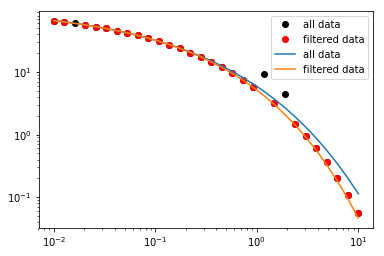

In [9]:
from astropy.modeling import models, fitting
from astropy.stats import sigma_clip
np.random.seed()
npts=30

amplitude=1
r_eff=3
n=2.5

x=np.logspace(-2,1,npts)
f_init = models.Sersic1D(amplitude=amplitude, r_eff=r_eff, n=n)

y=f_init(x)
y+=np.random.randn(*y.shape)*y*.01

# add some outliers
y[20]*=2.2
y[22]*=2



# initialize fitters
fit = fitting.LevMarLSQFitter()
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip,
                                           niter=3, sigma=3.0)
# fit all data
f_fit = fit(f_init, x, y)

# get fitted model and filtered data
filtered_data, or_f_fit = or_fit(f_init, x, y)

yfit0=f_fit(x)
yfitc=or_f_fit(x)

fig,ax=plt.subplots()

ax.plot(x,y,'ok',label='all data');
plt.plot(x, filtered_data, 'or', label="filtered data")
ax.plot(x,yfit0,label='all data');
ax.plot(x,yfitc,label='filtered data');
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend();


# Custom models
Let's define a custom model: the sum of a Gaussian and a straight line


IN:
Model: mymodel
Inputs: ('x',)
Outputs: ('x',)
Model set size: 1
Parameters:
     a0  a1 amplitude mean stddev
    --- --- --------- ---- ------
    0.0 0.0      10.0  0.0    5.0
OUT:
Model: mymodel
Inputs: ('x',)
Outputs: ('x',)
Model set size: 1
Parameters:
     a0  a1 amplitude mean stddev
    --- --- --------- ---- ------
    0.0 0.0      10.0  0.0    5.0


/home/marco/miniconda3/lib/python3.6/site-packages/astropy/modeling/functional_models.py:765: RuntimeWarning: invalid value encountered in power
  -cls._gammaincinv(2 * n, 0.5) * ((r / r_eff) ** (1 / n) - 1)))


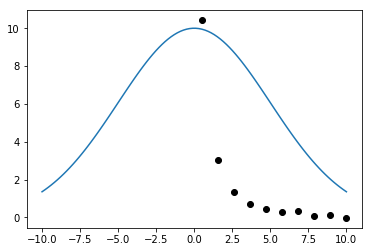

In [10]:
from astropy.modeling.models import custom_model

@custom_model
def mymodel(x, a0=0,a1=1,amplitude=1., mean=0., stddev=1.):
    l=a0+x*a1
    g=amplitude*np.exp(-.5*(x-mean)**2/stddev**2)
    return l+g

from astropy.modeling import models, fitting

np.random.seed(0)
npts=20

amplitude=10.0
mean=0.2
stddev=2.3
a0=1.6
a1=-.4

data_sigma=.1

x=np.linspace(-10,10,npts)

f=mymodel(a0=a0,a1=a1,amplitude=amplitude, mean=mean, stddev=stddev)
y=f_init(x)+np.random.normal(loc=0,scale=data_sigma,size=npts)

f_init = mymodel(a0=0,a1=0,amplitude=10, mean=0, stddev=5)

fit_g = fitting.LevMarLSQFitter()
f_fit = fit_g(f_init, x, y)

print ("IN:")
print (f_init)
print ("OUT:")
print (f_fit)
xfit=(np.linspace(x.min(),x.max(),100))
yfit=f_fit(xfit)

fig,ax=plt.subplots()

ax.plot(x,y,'ok');
ax.plot(xfit,yfit);

# Compound model
An additional way to create new models is by combining them using arithmetic expressions. This works with models built into Astropy, and most user-defined models as well. 

Let's repeat the previous case using compound models

IN:
Model: CompoundModel0
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Linear1D(slope=0.0, intercept=0.0)>

    [1]: <Gaussian1D(amplitude=10.0, mean=0.0, stddev=3.0)>
Parameters:
    slope_0 intercept_0 amplitude_1 mean_1 stddev_1
    ------- ----------- ----------- ------ --------
        0.0         0.0        10.0    0.0      3.0
OUT:
Model: CompoundModel0
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Linear1D(slope=0.0, intercept=0.0)>

    [1]: <Gaussian1D(amplitude=10.0, mean=0.0, stddev=3.0)>
Parameters:
    slope_0 intercept_0 amplitude_1 mean_1 stddev_1
    ------- ----------- ----------- ------ --------
        0.0         0.0        10.0    0.0      3.0


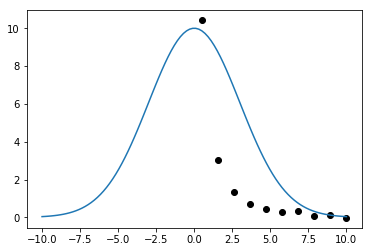

In [11]:
from astropy.modeling import models, fitting

f1=models.Linear1D(slope=0,intercept=0)
f2=models.Gaussian1D(amplitude=10,mean=0,stddev=3)
f_init = f1+f2


fit_g = fitting.LevMarLSQFitter()
f_fit = fit_g(f_init, x, y)

print ("IN:")
print (f_init)
print ("OUT:")
print (f_fit)
xfit=(np.linspace(x.min(),x.max(),100))
yfit=f_fit(xfit)

fig,ax=plt.subplots()

ax.plot(x,y,'ok');
ax.plot(xfit,yfit);